In [33]:
import os

In [34]:
base_dir = r"C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code"
file = os.listdir(base_dir)

train_dir = r"C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code\train"
test_dir = r'C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code\test'

train_benign_dir = r'C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code\train\benign'
train_malignant_dir = r'C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code\train\malignant'

test_benign_dir = r'C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code\test\benign'
test_malignant_dir = r'C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code\test\malignant'

In [35]:
train_benign_fnames = os.listdir(train_benign_dir)
train_malignant_fnames = os.listdir(train_malignant_dir)

print(train_benign_fnames[:10])
print(train_malignant_fnames[:10])

['melanoma_0.jpg', 'melanoma_1.jpg', 'melanoma_10.jpg', 'melanoma_100.jpg', 'melanoma_1000.jpg', 'melanoma_1001.jpg', 'melanoma_1002.jpg', 'melanoma_1003.jpg', 'melanoma_1004.jpg', 'melanoma_1005.jpg']
['melanoma_5000.jpg', 'melanoma_5001.jpg', 'melanoma_5002.jpg', 'melanoma_5003.jpg', 'melanoma_5004.jpg', 'melanoma_5005.jpg', 'melanoma_5006.jpg', 'melanoma_5007.jpg', 'melanoma_5008.jpg', 'melanoma_5009.jpg']


In [36]:
print('Total Train benign images: ', len(train_benign_fnames))
print('Total Train malignant images: ', len(train_malignant_fnames))

print("Total test benign images: ", len(os.listdir(test_benign_dir)))
print("Total test malignant images: ", len(os.listdir(test_malignant_dir)))

Total Train benign images:  5000
Total Train malignant images:  4605
Total test benign images:  500
Total test malignant images:  500


In [37]:

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# 4x4 configuration
nrows = 4
ncols = 4

# Index for image iteration
pic_index = 0

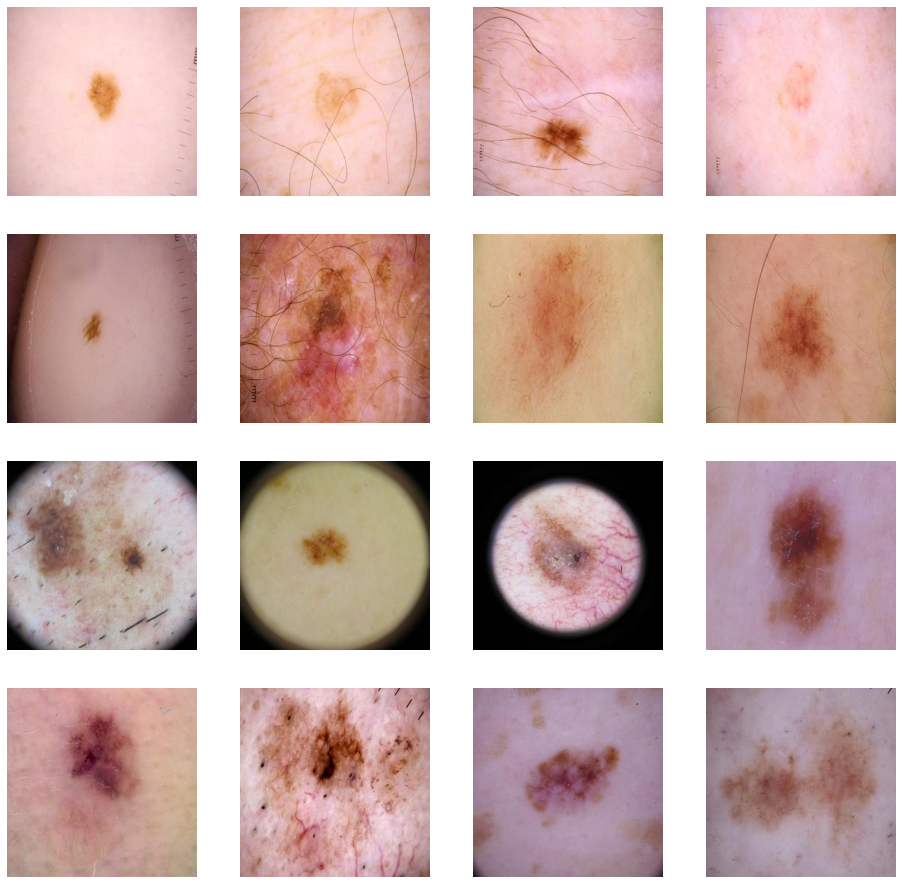

In [38]:
# Matplotlib fig, and sizing it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index +=8

next_benign_pix = [os.path.join(train_benign_dir, fname)
                for fname in train_benign_fnames[pic_index-8:pic_index]
                ]
next_malignant_pix = [os.path.join(train_malignant_dir, fname)
                for fname in train_malignant_fnames[pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_benign_pix+next_malignant_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()    

In [39]:
import tensorflow as tf

In [40]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
     

In [41]:
model.summary()

Model: "sequential_3"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       


 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         


 2D)                                                             


 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      


 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         


 2D)                                                             


 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     


 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)       0         


 2D)                                                             


 conv2d_7 (Conv2D)           (None, 15, 15, 64)        36928     


 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         


 2D)                                                             


 flatten_2 (Flatten)         (None, 3136)              0         


 dense_4 (Dense)             (None, 512)               1606144   


 dense_5 (Dense)             (None, 1)                 513       


Total params: 1,667,169


Trainable params: 1,667,169


Non-trainable params: 0


_________________________________________________________________


In [42]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    verbose=2,
                    validation_data = test_generator
                    )

C:\Users\Fortune\AppData\Local\Temp\ipykernel_16048\1456102458.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/15


100/100 - 44s - loss: 0.6637 - accuracy: 0.6715 - val_loss: 0.4237 - val_accuracy: 0.7870 - 44s/epoch - 436ms/step


Epoch 2/15


100/100 - 45s - loss: 0.4935 - accuracy: 0.7890 - val_loss: 0.3390 - val_accuracy: 0.8470 - 45s/epoch - 451ms/step


Epoch 3/15


100/100 - 44s - loss: 0.3770 - accuracy: 0.8460 - val_loss: 0.3578 - val_accuracy: 0.8380 - 44s/epoch - 444ms/step


Epoch 4/15


100/100 - 45s - loss: 0.3662 - accuracy: 0.8433 - val_loss: 0.3081 - val_accuracy: 0.8760 - 45s/epoch - 450ms/step


Epoch 5/15


100/100 - 45s - loss: 0.3254 - accuracy: 0.8565 - val_loss: 0.3084 - val_accuracy: 0.8690 - 45s/epoch - 448ms/step


Epoch 6/15


100/100 - 39s - loss: 0.3414 - accuracy: 0.8620 - val_loss: 0.3175 - val_accuracy: 0.8630 - 39s/epoch - 388ms/step


Epoch 7/15


100/100 - 38s - loss: 0.3190 - accuracy: 0.8665 - val_loss: 0.2685 - val_accuracy: 0.8860 - 38s/epoch - 383ms/step


Epoch 8/15


100/100 - 43s - loss: 0.3346 - accuracy: 0.8579 - val_loss: 0.2624 - val_accuracy: 0.8920 - 43s/epoch - 433ms/step


Epoch 9/15


100/100 - 43s - loss: 0.3277 - accuracy: 0.8761 - val_loss: 0.3115 - val_accuracy: 0.8820 - 43s/epoch - 427ms/step


Epoch 10/15


100/100 - 42s - loss: 0.2999 - accuracy: 0.8725 - val_loss: 0.3137 - val_accuracy: 0.8900 - 42s/epoch - 416ms/step


Epoch 11/15


100/100 - 41s - loss: 0.2976 - accuracy: 0.8840 - val_loss: 0.2569 - val_accuracy: 0.8900 - 41s/epoch - 408ms/step


Epoch 12/15


100/100 - 40s - loss: 0.2981 - accuracy: 0.8730 - val_loss: 0.2515 - val_accuracy: 0.8960 - 40s/epoch - 398ms/step


Epoch 13/15


100/100 - 40s - loss: 0.2804 - accuracy: 0.8900 - val_loss: 0.2826 - val_accuracy: 0.8830 - 40s/epoch - 397ms/step


Epoch 14/15


100/100 - 40s - loss: 0.2739 - accuracy: 0.8905 - val_loss: 0.2590 - val_accuracy: 0.8910 - 40s/epoch - 396ms/step


Epoch 15/15


100/100 - 40s - loss: 0.2815 - accuracy: 0.8835 - val_loss: 0.2485 - val_accuracy: 0.8890 - 40s/epoch - 398ms/step


In [49]:
import numpy as np
from keras.preprocessing import image

# Load your trained model
model = model

# Path to the image you want to predict
image_path_to_predict = r'C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code\test\benign\melanoma_9610.jpg'

# Load and preprocess the image
img = image.load_img(image_path_to_predict, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.  # Normalize the pixel values to the range [0, 1]

# Make a prediction
prediction = model.predict(x)

if prediction[0] > 0.5:
    print("The image is predicted as malignant.")
else:
    print("The image is predicted as benign.")

The image is predicted as benign.


In [51]:
model.save("C:\\Users\\Fortune\\Documents\\Final Year Project\\Skin Cancer Detection\\Skin cancer dataset and code")

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000012AE41A9310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000012AE41A9310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x0000012AE412FCA0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x0000012AE412FCA0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: C:\Users\Fortune\Documents\Final Year Project\Skin Cancer Detection\Skin cancer dataset and code\assets
